# Customer Segmentation Research & Implementation

# Introduction

**Customer segmentation** is a process of dividing customers into groups based on shared characteristics such as demographics, behavior, or purchasing patterns. There are different clustering algorithms that can be used for customer segmentation, each with its advantages and disadvantages. In this case, you want to use K-means, DBSCAN, CRM and LRFM, Fuzzy clustering, and Hierarchical clustering to segment your customers. Let's discuss each of these algorithms briefly:

* K-means clustering: This algorithm partitions the data into K clusters, where K is a predefined number. Each data point belongs to the cluster whose mean is closest to it. This algorithm is easy to implement and computationally efficient, but it assumes that clusters are spherical, equally sized, and have similar densities.
* DBSCAN: This algorithm groups together points that are close to each other based on a density criterion. Points that are close together and have high density are considered part of the same cluster. This algorithm is robust to noise and can handle arbitrary-shaped clusters, but it requires specifying two parameters: epsilon (the radius around each point) and min_points (the minimum number of points to form a cluster).
* CRM and LRFM: These are marketing segmentation methods that use customer behavior and purchasing patterns to group customers into segments. CRM (Customer Relationship Management) focuses on customer interactions with the company, while LRFM (Recency, Frequency, Monetary) focuses on the frequency, recency, and monetary value of customer purchases.
* Fuzzy clustering: This algorithm assigns a degree of membership to each data point to each cluster. A point can belong to multiple clusters with varying degrees of membership. This algorithm is useful when a data point is ambiguous and can belong to multiple clusters.
* Hierarchical clustering: This algorithm groups data points into a hierarchy of clusters using a bottom-up (agglomerative) or top-down (divisive) approach. Each data point starts as its cluster, and the algorithm iteratively merges or splits clusters based on a distance criterion. This algorithm can be used to visualize the relationships between clusters at different levels of granularity.

To determine which algorithm is best for your customer segmentation task, you can compare their results based on metrics such as cluster validity, interpretability, and computational efficiency. You can also experiment with different parameters and preprocessing steps to optimize the results.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ccdata/CC GENERAL.csv


> numpy

NumPy is an open source project that enables numerical computing with Python. It was created in 2005 building on the early work of the Numeric and Numarray libraries. NumPy will always be 100% open source software and free for all to use. It is released under the liberal terms of the modified BSD license. NumPy is developed in the open on GitHub, through the consensus of the NumPy and wider scientific Python community. For more information on our governance approach, please see our Governance Document.

> pandas

Pandas is an open-source library that is made mainly for working with relational or labeled data both easily and intuitively. It provides various data structures and operations for manipulating numerical data and time series. This library is built on top of the NumPy library. Pandas is fast and it has high performance & productivity for users.

In [2]:
data = pd.read_csv("/kaggle/input/ccdata/CC GENERAL.csv")
print(data.shape)
data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# About Dataset

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

* CUST_ID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment
* CASH_ADVANCE : Cash in advance given by the user
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX : Numbe of purchase transactions made
* CREDIT_LIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

# Understanding & Pre-Processing Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# drop customer Id column.
data.drop(['CUST_ID'], axis=1, inplace=True)

In [5]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

So there are 313 null values in MINIMUM_PAYMENTS and 1 in CREDIT_LIMIT. We can either remove the rows corresponding to these cells or replace it with mean values. Considering not many cells are null, we will use **mean to occupy the space**.

In [6]:
data = data.fillna(data.mean())

# Verify all the columns are filled
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Rounding all the feature values by two decimal places for simplification

In [7]:
data = data.round(2)

In [8]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.51,0.00,12
1,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.34,0.22,12
2,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.28,0.00,12
3,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,864.21,0.00,12
4,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.79,0.00,12


In [9]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474826,0.877426,1003.204834,592.437371,411.067645,978.871102,0.490217,0.202177,0.364553,0.134911,3.248827,14.709832,4494.449450,1733.143878,864.206687,0.153534,11.517318
std,2081.531851,0.237169,2136.634782,1659.887917,904.338115,2097.163869,0.401678,0.298555,0.397623,0.200262,6.824647,24.857649,3638.612412,2895.063787,2330.588020,0.292648,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.020000,0.000000,6.000000
25%,128.280000,0.890000,39.635000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.272500,170.857500,0.000000,12.000000
50%,873.385000,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.080000,0.170000,0.000000,0.000000,7.000000,3000.000000,856.900000,335.630000,0.000000,12.000000
75%,2054.137500,1.000000,1110.130000,577.405000,468.637500,1113.822500,0.920000,0.300000,0.750000,0.220000,4.000000,17.000000,6500.000000,1901.135000,864.210000,0.140000,12.000000
max,19043.140000,1.000000,49039.570000,40761.250000,22500.000000,47137.210000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.480000,76406.210000,1.000000,12.000000


**Correlation table** to know relationship between features

In [10]:
corr_matrix = data.corr()
corr_matrix[corr_matrix<=0.5]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,NaN,0.321915,0.181261,0.164350,0.126469,0.496692,-0.077849,0.073180,-0.063164,0.449174,0.385152,0.154338,NaN,0.322802,0.394282,-0.318776,0.072692
BALANCE_FREQUENCY,0.321915,NaN,0.133609,0.104225,0.124315,0.099400,0.230049,0.202483,0.176200,0.191735,0.141427,0.189429,0.095646,0.064976,0.114044,-0.094510,0.119524
PURCHASES,0.181261,0.133609,NaN,NaN,NaN,-0.051474,0.392921,0.498460,0.315497,-0.119933,-0.067175,NaN,0.356959,NaN,0.093514,0.180313,0.086288
ONEOFF_PURCHASES,0.164350,0.104225,NaN,NaN,0.330622,-0.031326,0.264855,NaN,0.127672,-0.082484,-0.046212,NaN,0.319721,NaN,0.048597,0.132712,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124315,NaN,0.330622,NaN,-0.064244,0.442342,0.214192,NaN,-0.132086,-0.073999,NaN,0.256496,0.384084,0.131687,0.182506,0.086143
CASH_ADVANCE,0.496692,0.099400,-0.051474,-0.031326,-0.064244,NaN,-0.215433,-0.086697,-0.177021,NaN,NaN,-0.075850,0.303983,0.453238,0.139223,-0.153032,-0.068312
PURCHASES_FREQUENCY,-0.077849,0.230049,0.392921,0.264855,0.442342,-0.215433,NaN,NaN,NaN,-0.307593,-0.203405,NaN,0.119751,0.103436,0.002964,0.305791,0.061451
ONEOFF_PURCHASES_FREQUENCY,0.073180,0.202483,0.498460,NaN,0.214192,-0.086697,NaN,NaN,0.142607,-0.111159,-0.068987,NaN,0.295032,0.243628,-0.029984,0.157709,0.082407
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063164,0.176200,0.315497,0.127672,NaN,-0.177021,NaN,0.142607,NaN,-0.262349,-0.169193,NaN,0.060744,0.085513,0.029572,0.249980,0.073346
CASH_ADVANCE_FREQUENCY,0.449174,0.191735,-0.119933,-0.082484,-0.132086,NaN,-0.307593,-0.111159,-0.262349,NaN,NaN,-0.130835,0.132796,0.183119,0.097775,-0.249355,-0.133408


# Choosing Number of Clusters

Choosing the appropriate value of k is an important step in K-means clustering. There are several methods to determine the optimal number of clusters. Here are some common methods:

* Elbow method: This method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters k and selecting the value of k at the "elbow" of the curve, which represents a significant drop in the WCSS. The idea is that as we increase the number of clusters, the WCSS will decrease, but at some point, the marginal decrease in WCSS will become less significant. The elbow point represents the optimal value of k that balances the trade-off between model complexity and clustering performance.
* Silhouette score: This method measures the quality of clustering by computing the average distance between each point and its own cluster compared to the average distance to the nearest neighboring cluster. The score ranges from -1 to 1, with higher values indicating better-defined clusters. The optimal value of k corresponds to the highest silhouette score.
* Gap statistic: This method compares the within-cluster dispersion for different values of k with that of a null reference distribution generated by randomly shuffling the data. The optimal value of k corresponds to the point at which the gap between the within-cluster dispersion and the null reference distribution is the largest.
* Average silhouette width: This method computes the average silhouette score for each value of k and selects the value of k that maximizes the average silhouette width.

In practice, there is no single "best" method for choosing k, and different methods may produce different values of k. Therefore, it is recommended to try different methods and compare the results to make an informed decision.

> matplotlib

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

> sklearn

Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

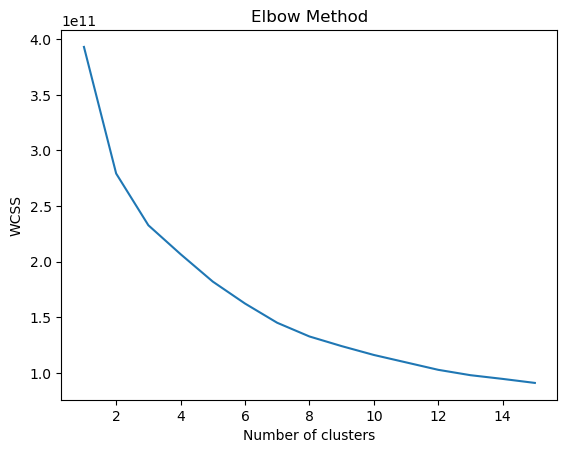

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# load data
X = data

# calculate within-cluster sum of squares for different values of k
wcss = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We are not able to clearly defined a differentation point from the visual graph. K can be anywhere around 2 to 12

In [12]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
# Let's try to plot other metrics in the same chart as well

silhouette = []
davies_bouldin = []

for i in range(2, 16): 
    kmeans = KMeans(n_clusters = i, random_state = 0)
    labels = kmeans.fit_predict(X)
    silhouette.append(silhouette_score(data, labels))
    davies_bouldin.append(davies_bouldin_score(data, labels))

Let's also consider other methods to choose number of K:

* The **Silhouette Coefficient** is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1. This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

* **Calinski-Harabasz (CH) Index** (introduced by Calinski and Harabasz in 1974) can be used to evaluate the model when ground truth labels are not known where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset. The CH Index (also known as Variance ratio criterion) is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Here cohesion is estimated based on the distances from the data points in a cluster to its cluster centroid and separation is based on the distance of the cluster centroids from the global centroid. CH index has a form of (a . Separation)/(b . Cohesion) , where a and b are weights. Higher value of CH index means the clusters are dense and well separated, although there is no “acceptable” cut-off value. We need to choose that solution which gives a peak or at least an abrupt elbow on the line plot of CH indices. On the other hand, if the line is smooth (horizontal or ascending or descending) then there is no such reason to prefer one solution over others. 

* **Davies-Bouldin score**. The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering.

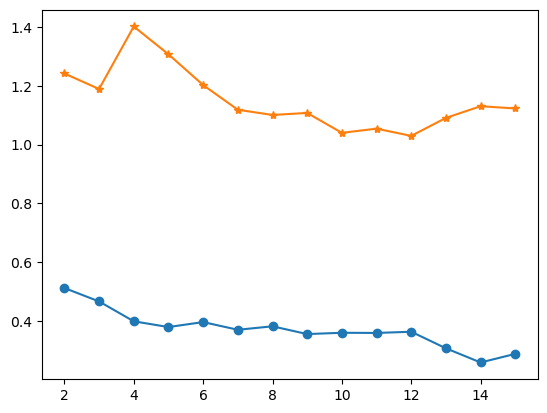

In [13]:
kvalue = range(2, 16)
plt.plot(kvalue, silhouette, marker='o')
plt.plot(kvalue, davies_bouldin, marker='*')
plt.show()

We can see that both the lines are closest to each other around 3, 7 and probably 10. Let's keep our range of cluster groups from 2-11 to calculate clustering score. We can iterated these cluster group number and get the numerical result, where we have more confidence.

In [14]:
pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4429312df624572d53afcedfa7cb7f7e8fc2f6ae04ec498a59e1463df927a0c8
  Stored in directory: /root/.cache/pip/wheels/54/07/81/0c3a15b7bc115d78892a6d8ece8352b4559f1f5d3fc015be9a
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


> scikitfuzzy / skfuzzy

Scikit-Fuzzy is a collection of fuzzy logic algorithms intended for use in the SciPy Stack, written in the Python computing language. This SciKit is developed by the SciPy community.

> scipy

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data.

In [15]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import skfuzzy as fuzz
from skfuzzy.cluster import cmeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

X = data

#converting to dataframe for compatibility
X = pd.DataFrame(X)

# standardize the data
#scaler = StandardScaler()
#to_be_cleaned = scaler.fit_transform(X)

# Instantiate a MinMaxScaler object
scaler = MinMaxScaler()
# Fit the scaler to your dataset and transform it
scaled_data = scaler.fit_transform(X)
# Create a new pandas dataframe with the scaled data

#saving the nsame of columns
to_be_cleaned = pd.DataFrame(scaled_data, columns=X.columns)

#to_be_cleaned = pd.DataFrame(to_be_cleaned, columns=X.columns)
z_threshold = 3

# iterate over each column in the DataFrame
for column in to_be_cleaned.columns:
    # calculate the z-score for each data point in the column
    z_scores = np.abs((to_be_cleaned[column] - to_be_cleaned[column].mean()) / to_be_cleaned[column].std())

    # remove any data point with a z-score greater than the threshold
    to_be_cleaned = to_be_cleaned[z_scores <= z_threshold]

# convert the NumPy array back to a pandas DataFrame
to_be_cleaned = pd.DataFrame(to_be_cleaned, columns=X.columns)

# descale the data
cleaned_data = scaler.inverse_transform(to_be_cleaned)
cleaned_data = pd.DataFrame(cleaned_data, columns=X.columns)

# save the cleaned dataset to a new file
to_be_cleaned.to_csv('my_cleaned_dataset.csv', index=False)

Here we took our data and scaled all the feature values in range of 0-1 for standardization to help train our model much better. Then we iterated values of threshold for outlier removal. Best case was found when threshold was set to 3, data was not much removed but had significant improvement in clustering result as compared to orginial data with outliers.

In [16]:
data_with_no_outliers = pd.read_csv("/kaggle/working/my_cleaned_dataset.csv")
X_std = data_with_no_outliers
print(X_std.shape)

(6708, 17)


In [17]:
X_std_descaled = scaler.inverse_transform(data_with_no_outliers)
X_std_descaled = pd.DataFrame(X_std_descaled, columns=X.columns)
X_std_descaled.to_csv('my_cleaned_dataset_not_scaled.csv', index=False)
print(X_std_descaled.shape)

(6708, 17)


In [18]:
X_std.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000
mean,0.061757,0.885078,0.012142,0.007994,0.011994,0.012370,0.468278,0.171576,0.343518,0.068072,0.016137,0.028438,0.122500,0.020603,0.007107,0.147770,0.956694
std,0.075356,0.218493,0.014903,0.013609,0.017990,0.022798,0.391697,0.268929,0.386034,0.099226,0.025983,0.032787,0.090190,0.019405,0.008920,0.284595,0.135759
min,0.000000,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003339,0.000000,0.000000,0.000000,0.333333
25%,0.005117,0.900000,0.000880,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.002793,0.048414,0.007134,0.002157,0.000000,1.000000
50%,0.037411,1.000000,0.006686,0.000000,0.003367,0.000000,0.420000,0.000000,0.170000,0.000000,0.000000,0.019553,0.098497,0.014058,0.003594,0.000000,1.000000
75%,0.085690,1.000000,0.017641,0.010677,0.017733,0.016095,0.920000,0.250000,0.670000,0.113333,0.024390,0.039106,0.169297,0.027487,0.008884,0.120000,1.000000
max,0.409758,1.000000,0.091849,0.073390,0.094163,0.138400,1.000000,1.000000,1.000000,0.446667,0.121951,0.164804,0.432387,0.110139,0.079032,1.000000,1.000000


In [19]:
# define number of clusters for K-means
k_values = range(2, 12)

In [20]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [21]:
for k in k_values:
    # perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_std)
    kmeans_labels = kmeans.labels_
    kmeans_silhoutte_score = silhouette_score(X_std, kmeans_labels)
    kmeans_calinski_score = calinski_harabasz_score(X_std, kmeans_labels)
    kmeans_davies_bouldin_score = davies_bouldin_score(X_std, kmeans_labels)


    # print silhouette scores
    print("For k =", k)
    print("K-means silhouette score:", round(kmeans_silhoutte_score, 4))
    print("K-means Calinski Harabasz score:", round(kmeans_calinski_score, 4))
    print("K-means Davies Bouldin score:", round(kmeans_davies_bouldin_score, 4))

For k = 2
K-means silhouette score: 0.4197
K-means Calinski Harabasz score: 5422.3269
K-means Davies Bouldin score: 1.0267
For k = 3
K-means silhouette score: 0.4177
K-means Calinski Harabasz score: 4202.8962
K-means Davies Bouldin score: 1.1611
For k = 4
K-means silhouette score: 0.3762
K-means Calinski Harabasz score: 3776.113
K-means Davies Bouldin score: 1.2334
For k = 5
K-means silhouette score: 0.3736
K-means Calinski Harabasz score: 3694.4599
K-means Davies Bouldin score: 1.138
For k = 6
K-means silhouette score: 0.3523
K-means Calinski Harabasz score: 3541.9897
K-means Davies Bouldin score: 1.1005
For k = 7
K-means silhouette score: 0.362
K-means Calinski Harabasz score: 3429.0394
K-means Davies Bouldin score: 1.0296
For k = 8
K-means silhouette score: 0.3685
K-means Calinski Harabasz score: 3290.2514
K-means Davies Bouldin score: 1.0386
For k = 9
K-means silhouette score: 0.3774
K-means Calinski Harabasz score: 3229.2493
K-means Davies Bouldin score: 0.9651
For k = 10
K-means 

In [22]:
for k in k_values:
    # Agglomerative clustering
    agglo = AgglomerativeClustering(n_clusters=k)
    agglo_labels = agglo.fit_predict(X_std)
    agglo_silhoutte_score = silhouette_score(X_std, agglo_labels)
    agglo_calinski_score = calinski_harabasz_score(X_std, agglo_labels)
    agglo_davies_bouldin_score = davies_bouldin_score(X_std, agglo_labels)
    
    print("For k =", k)
    print("Agglomerative clustering silhouette score:", round(agglo_silhoutte_score, 4))
    print("Agglomerative clustering Calinski Harabasz score:", round(agglo_calinski_score, 4))
    print("Agglomerative clustering Davies Bouldin score:", round(agglo_davies_bouldin_score, 4))

For k = 2
Agglomerative clustering silhouette score: 0.3746
Agglomerative clustering Calinski Harabasz score: 4617.9525
Agglomerative clustering Davies Bouldin score: 1.0809
For k = 3
Agglomerative clustering silhouette score: 0.3128
Agglomerative clustering Calinski Harabasz score: 3478.0045
Agglomerative clustering Davies Bouldin score: 1.4264
For k = 4
Agglomerative clustering silhouette score: 0.304
Agglomerative clustering Calinski Harabasz score: 3072.8094
Agglomerative clustering Davies Bouldin score: 1.3477
For k = 5
Agglomerative clustering silhouette score: 0.3084
Agglomerative clustering Calinski Harabasz score: 2909.3757
Agglomerative clustering Davies Bouldin score: 1.4015
For k = 6
Agglomerative clustering silhouette score: 0.3161
Agglomerative clustering Calinski Harabasz score: 2765.2303
Agglomerative clustering Davies Bouldin score: 1.285
For k = 7
Agglomerative clustering silhouette score: 0.3313
Agglomerative clustering Calinski Harabasz score: 2744.4045
Agglomerativ

In [23]:
for k in k_values:
    # perform fuzzy clustering
    cntr, u, u0, d, jm, p, fpc = cmeans(X_std.T, k, 2, error=0.005, maxiter=1000)
    fuzzy_labels = np.argmax(u, axis=0)
    fuzzy_silhoutte_score = silhouette_score(X_std, fuzzy_labels)
    fuzzy_calinski_score = calinski_harabasz_score(X_std, fuzzy_labels)
    fuzzy_davies_bouldin_score = davies_bouldin_score(X_std, fuzzy_labels)
    
    print("For k =", k)
    print("Fuzzy clustering silhouette score:", round(fuzzy_silhoutte_score, 4))
    print("Fuzzy clustering Calinski Harabasz score:", round(fuzzy_calinski_score, 4))
    print("Fuzzy clustering Davies Bouldin score:", round(fuzzy_davies_bouldin_score, 4))

For k = 2
Fuzzy clustering silhouette score: 0.4194
Fuzzy clustering Calinski Harabasz score: 5415.893
Fuzzy clustering Davies Bouldin score: 1.0263
For k = 3
Fuzzy clustering silhouette score: 0.3446
Fuzzy clustering Calinski Harabasz score: 3916.5963
Fuzzy clustering Davies Bouldin score: 1.4711
For k = 4
Fuzzy clustering silhouette score: 0.3279
Fuzzy clustering Calinski Harabasz score: 3484.3252
Fuzzy clustering Davies Bouldin score: 1.4239
For k = 5
Fuzzy clustering silhouette score: 0.3518
Fuzzy clustering Calinski Harabasz score: 3524.1343
Fuzzy clustering Davies Bouldin score: 1.1716
For k = 6
Fuzzy clustering silhouette score: 0.3487
Fuzzy clustering Calinski Harabasz score: 3487.5113
Fuzzy clustering Davies Bouldin score: 1.1069
For k = 7
Fuzzy clustering silhouette score: 0.2905
Fuzzy clustering Calinski Harabasz score: 3182.7314
Fuzzy clustering Davies Bouldin score: 1.2019
For k = 8
Fuzzy clustering silhouette score: 0.27
Fuzzy clustering Calinski Harabasz score: 2892.2309

In [24]:
from scipy.cluster.hierarchy import linkage, fcluster

for k in k_values:
    # perform hierarchical clustering
    hierarchical_labels = fcluster(linkage(X_std, method='ward'), t=k, criterion='distance')
    hierarchical_silhoutte_score = silhouette_score(X_std, hierarchical_labels)
    hierarchical_calinski_score = calinski_harabasz_score(X_std, hierarchical_labels)
    hierarchical_davies_bouldin_score = davies_bouldin_score(X_std, hierarchical_labels)

    print("For k =", k)
    print("Hierarchical clustering silhouette score:", round(hierarchical_silhoutte_score, 4))
    print("Hierarchical clustering Calinski Harabasz score:", round(hierarchical_calinski_score, 4))
    print("Hierarchical clustering Davies Bouldin score:", round(hierarchical_davies_bouldin_score, 4))

For k = 2
Hierarchical clustering silhouette score: 0.1986
Hierarchical clustering Calinski Harabasz score: 1126.9387
Hierarchical clustering Davies Bouldin score: 1.3123
For k = 3
Hierarchical clustering silhouette score: 0.18
Hierarchical clustering Calinski Harabasz score: 1388.7322
Hierarchical clustering Davies Bouldin score: 1.3405
For k = 4
Hierarchical clustering silhouette score: 0.208
Hierarchical clustering Calinski Harabasz score: 1595.6304
Hierarchical clustering Davies Bouldin score: 1.3389
For k = 5
Hierarchical clustering silhouette score: 0.212
Hierarchical clustering Calinski Harabasz score: 1844.2804
Hierarchical clustering Davies Bouldin score: 1.2759
For k = 6
Hierarchical clustering silhouette score: 0.2547
Hierarchical clustering Calinski Harabasz score: 2106.3114
Hierarchical clustering Davies Bouldin score: 1.2831
For k = 7
Hierarchical clustering silhouette score: 0.2615
Hierarchical clustering Calinski Harabasz score: 2288.832
Hierarchical clustering Davies B

In [25]:
from sklearn.mixture import GaussianMixture
for k in k_values:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X_std)
    gmm_labels = gmm.predict(X_std)
    gmm_silhouette_score = silhouette_score(X_std, gmm_labels)
    gmm_calinski_score = calinski_harabasz_score(X_std, gmm_labels)
    gmm_davies_bouldin_score = davies_bouldin_score(X_std, gmm_labels)

    # print the scores for the current value of k
    print("For k =", k)
    print("Gaussian Mixture silhouette score:", round(gmm_silhouette_score, 4))
    print("Gaussian Mixture Calinski Harabasz score:", round(gmm_calinski_score,4))
    print("Gaussian Mixture Davies Bouldin score:", round(gmm_davies_bouldin_score, 4))

For k = 2
Gaussian Mixture silhouette score: 0.2991
Gaussian Mixture Calinski Harabasz score: 3287.4057
Gaussian Mixture Davies Bouldin score: 1.194
For k = 3
Gaussian Mixture silhouette score: 0.1379
Gaussian Mixture Calinski Harabasz score: 1555.222
Gaussian Mixture Davies Bouldin score: 3.4607
For k = 4
Gaussian Mixture silhouette score: 0.1531
Gaussian Mixture Calinski Harabasz score: 1204.3316
Gaussian Mixture Davies Bouldin score: 2.9758
For k = 5
Gaussian Mixture silhouette score: 0.02
Gaussian Mixture Calinski Harabasz score: 916.5922
Gaussian Mixture Davies Bouldin score: 3.4925
For k = 6
Gaussian Mixture silhouette score: 0.0581
Gaussian Mixture Calinski Harabasz score: 910.3106
Gaussian Mixture Davies Bouldin score: 3.2226
For k = 7
Gaussian Mixture silhouette score: 0.0256
Gaussian Mixture Calinski Harabasz score: 719.4391
Gaussian Mixture Davies Bouldin score: 4.3993
For k = 8
Gaussian Mixture silhouette score: 0.0459
Gaussian Mixture Calinski Harabasz score: 836.7013
Gaus

In [26]:
from sklearn.cluster import AffinityPropagation

affinity_propagation = AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15)
ap_labels = affinity_propagation.fit_predict(X_std)

ap_silhouette_score = silhouette_score(X_std, ap_labels)
ap_calinski_score = calinski_harabasz_score(X_std, ap_labels)
ap_davies_bouldin_score = davies_bouldin_score(X_std, ap_labels)

print("Affinity Propagation silhouette score:", round(ap_silhouette_score, 4))
print("Affinity Propagation Calinski Harabasz score:", round(ap_calinski_score,4))
print("Affinity Propagation Davies Bouldin score:", round(ap_davies_bouldin_score, 4))

Affinity Propagation silhouette score: 0.2006
Affinity Propagation Calinski Harabasz score: 977.3086
Affinity Propagation Davies Bouldin score: 1.3157


**K-Means and Fuzzy** showed great results considering our evalution parameters.

**Principal Component Analysis** is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components. It is one of the popular tools that is used for exploratory data analysis and predictive modeling. It is a technique to draw strong patterns from the given dataset by reducing the variances.

PCA generally tries to find the lower-dimensional surface to project the high-dimensional data.

PCA works by considering the variance of each attribute because the high attribute shows the good split between the classes, and hence it reduces the dimensionality. Some real-world applications of PCA are image processing, movie recommendation system, optimizing the power allocation in various communication channels. It is a feature extraction technique, so it contains the important variables and drops the least important variable.

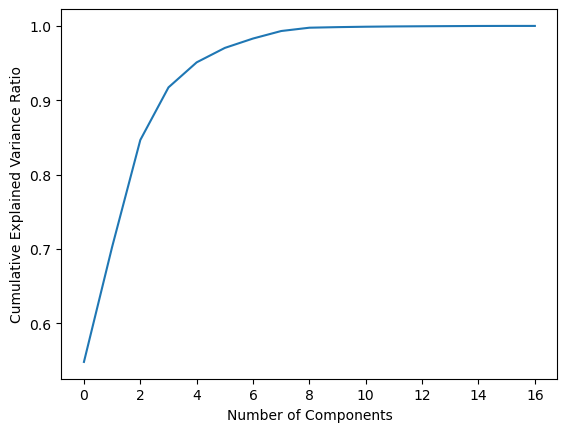

Optimal number of components: 5
Shape of transformed features: (6708, 5)


In [27]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

X = pd.read_csv("/kaggle/working/my_cleaned_dataset.csv")

# Fit the PCA object to the standardized features
pca.fit(X)

# Find the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Find the cumulative sum of the explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative sum of the explained variance ratio
import matplotlib.pyplot as plt
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# Find the optimal number of components
optimal_n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Print the optimal number of components
print("Optimal number of components:", optimal_n_components)

# Create a new PCA object with the optimal number of components
pca = PCA(n_components=optimal_n_components)

# Transform the standardized features using the new PCA object
X_pca = pca.fit_transform(X)

# Print the shape of the transformed features
print("Shape of transformed features:", X_pca.shape)

We automated the task of choosing the right number of component to fit PCA. After running it now our features are trimed from 17 to 5

In PCA (Principal Component Analysis), the **explained variance ratio** is a measure of how much information (or variance) each principal component captures from the original data. It is the ratio of the variance of a principal component to the total variance of all the principal components. For example, if we have performed PCA on a dataset with 10 features and we have 5 principal components, the explained variance ratio of the first principal component is the ratio of the variance of the first principal component to the sum of the variances of all 5 principal components. The explained variance ratio is a useful metric to evaluate the effectiveness of PCA in reducing the dimensionality of the data. It tells us how much of the original data's variance is retained in the reduced feature set. Higher explained variance ratio for a principal component indicates that it captures more important features of the original data.

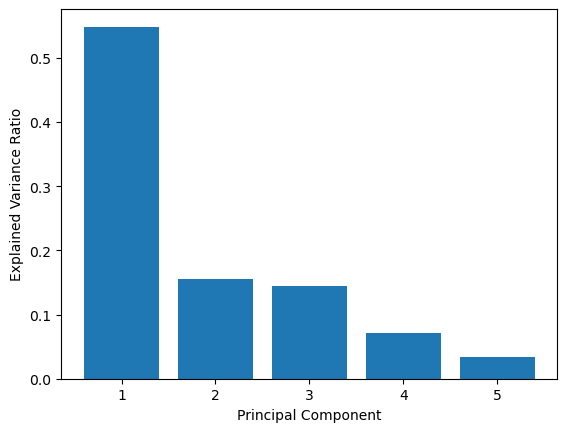

In [28]:
# Plot the explained variance ratio of each principal component
plt.bar(range(1, 6), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Save the transformed dataset with 5 principal components
transformed_df = pd.DataFrame(X_pca)
transformed_df.to_csv('pca_transformed_data.csv', index=False)

**Cumulative explained variance ratio** is the sum of explained variance ratios for all the principal components up to a certain point. It is often used in PCA to determine the number of principal components to retain for further analysis. For example, if we have performed PCA on a dataset with 10 principal components, and the explained variance ratios for each component are [0.2, 0.15, 0.1, 0.08, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01], then the cumulative explained variance ratio for the first two principal components would be 0.2 + 0.15 = 0.35. Similarly, the cumulative explained variance ratio for the first five principal components would be 0.2 + 0.15 + 0.1 + 0.08 + 0.06 = 0.59. By examining the cumulative explained variance ratio, we can determine the number of principal components to keep for further analysis. Typically, we want to keep enough principal components to capture a large portion of the variance in the data, while also minimizing the number of components to avoid overfitting. A common threshold for determining the number of principal components to keep is to retain enough components to capture 80-90% of the cumulative explained variance.

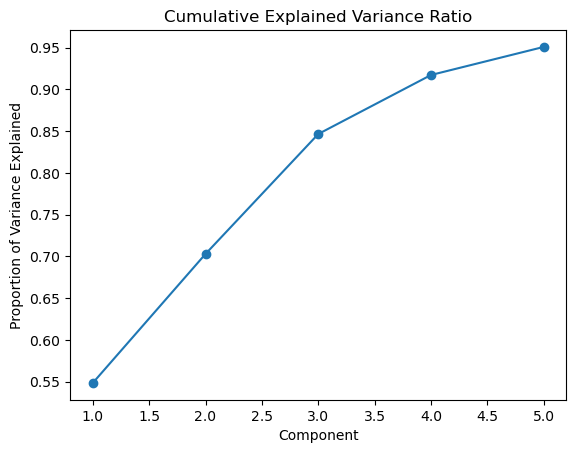

In [29]:
# Plot the cumulative sum of explained variance ratio
plt.plot(range(1, 6), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

# Plot the first two components
#plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='rainbow')
#plt.colorbar()
#plt.title('First Two Components')
#plt.xlabel('PC 1')
#plt.ylabel('PC 2')
#plt.show()

**Loading** of each components from all 17 features

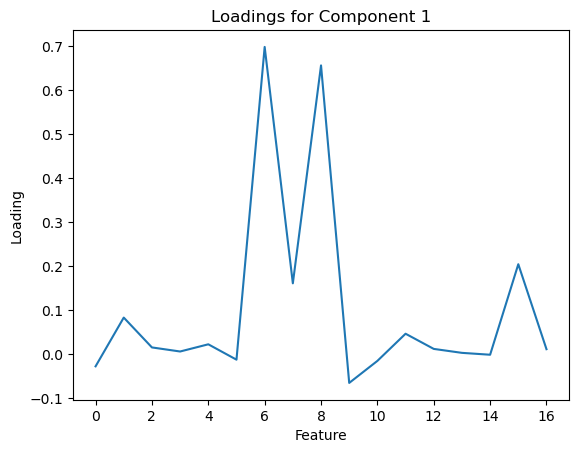

In [30]:
plt.plot(pca.components_[0])
plt.xlabel('Feature')
plt.ylabel('Loading')
plt.title('Loadings for Component 1')
plt.show()

In [31]:
# Get the principal component weights
weights = pca.components_

# Print the contribution of each feature to the first three principal components
for i in range(5):
    print(f"Principal component {i+1}:")
    for feature, weight in zip(X.columns, weights[i]):
        print(f"\t{feature}: {weight:.3f}")

Principal component 1:
	BALANCE: -0.028
	BALANCE_FREQUENCY: 0.083
	PURCHASES: 0.015
	ONEOFF_PURCHASES: 0.006
	INSTALLMENTS_PURCHASES: 0.022
	CASH_ADVANCE: -0.013
	PURCHASES_FREQUENCY: 0.698
	ONEOFF_PURCHASES_FREQUENCY: 0.161
	PURCHASES_INSTALLMENTS_FREQUENCY: 0.656
	CASH_ADVANCE_FREQUENCY: -0.065
	CASH_ADVANCE_TRX: -0.015
	PURCHASES_TRX: 0.046
	CREDIT_LIMIT: 0.012
	PAYMENTS: 0.003
	MINIMUM_PAYMENTS: -0.001
	PRC_FULL_PAYMENT: 0.204
	TENURE: 0.011
Principal component 2:
	BALANCE: 0.072
	BALANCE_FREQUENCY: 0.296
	PURCHASES: 0.020
	ONEOFF_PURCHASES: 0.028
	INSTALLMENTS_PURCHASES: -0.009
	CASH_ADVANCE: 0.004
	PURCHASES_FREQUENCY: 0.205
	ONEOFF_PURCHASES_FREQUENCY: 0.790
	PURCHASES_INSTALLMENTS_FREQUENCY: -0.342
	CASH_ADVANCE_FREQUENCY: 0.032
	CASH_ADVANCE_TRX: 0.007
	PURCHASES_TRX: 0.033
	CREDIT_LIMIT: 0.071
	PAYMENTS: 0.013
	MINIMUM_PAYMENTS: 0.005
	PRC_FULL_PAYMENT: -0.339
	TENURE: 0.039
Principal component 3:
	BALANCE: -0.096
	BALANCE_FREQUENCY: -0.333
	PURCHASES: 0.007
	ONEOFF_PURCHASES

In [32]:
X_std = pd.read_csv('/kaggle/working/pca_transformed_data.csv')
# perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_std)
kmeans_labels = kmeans.labels_
kmeans_silhoutte_score = silhouette_score(X_std, kmeans_labels)
kmeans_calinski_score = calinski_harabasz_score(X_std, kmeans_labels)
kmeans_davies_bouldin_score = davies_bouldin_score(X_std, kmeans_labels)

# print silhouette scores
print("For k = 3")
print("K-means silhouette score:", round(kmeans_silhoutte_score, 4))
print("K-means Calinski Harabasz score:", round(kmeans_calinski_score, 4))
print("K-means Davies Bouldin score:", round(kmeans_davies_bouldin_score, 4))

For k = 3
K-means silhouette score: 0.4492
K-means Calinski Harabasz score: 4720.3224
K-means Davies Bouldin score: 1.0746


Our performance for labelling is increased where we choose K-means with three cluster groups.

In [33]:
# Saving cluster Group in PCA component CSV
X_std['Cluster_Group'] = kmeans.labels_
X_std.to_csv("labelled_pca_dataset.csv", index=False)

In [34]:
data_with_no_outliers = pd.read_csv("/kaggle/working/my_cleaned_dataset.csv")
labelled_dataset = data_with_no_outliers
labelled_dataset['CLUSTER_GROUP'] = kmeans.labels_
labelled_dataset.to_csv("labelled_dataset.csv", index=False)

# Supervied Model Training for Prediction

* Decision Tree Classifier: A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. Decision tree classifier is a type of supervised learning algorithm that is mostly used for classification problems.
* Random Forest Classifier: Random forest is a type of ensemble learning algorithm that is used for classification, regression, and other tasks. In random forest, we grow multiple decision trees and combine their results to classify new data. Random forests can improve the performance of decision trees by reducing overfitting.
* Gradient Boosting Classifier: Gradient boosting is a machine learning technique for regression and classification problems that produces a prediction model in the form of an ensemble of weak prediction models. It builds the model in a stage-wise fashion like other boosting methods, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.
* AdaBoost Classifier: AdaBoost is an ensemble learning method that uses multiple models to improve the predictive performance. AdaBoost works by creating a base decision tree model, then using that model to make predictions on the training data, and then boosting the weights of the training data that were not predicted correctly.
* K-Nearest Neighbors Classifier: K-Nearest Neighbors (K-NN) is a type of instance-based learning or lazy learning where the function is only approximated locally and all computation is deferred until classification. K-NN is used for classification and regression.
* Gaussian Naive Bayes Classifier: Naive Bayes is a family of probabilistic algorithms that use Bayes' theorem to make predictions. The Gaussian Naive Bayes classifier assumes that the features are normally distributed and independent of each other.
* Logistic Regression: Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. Logistic regression is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
* Support Vector Machine Classifier: Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs work by finding the hyperplane that maximizes the margin between the two classes.
* Extra Trees Classifier: Extra Trees is an ensemble learning method that combines decision trees in a random way to reduce variance and improve accuracy. Extra Trees Classifier is a type of Random Forest.
* Bagging Classifier: Bagging is a technique used to reduce the variance of a machine learning algorithm. Bagging Classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions to form a final prediction.
* XGBoost Classifier: XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. XGBoost is a type of gradient boosting algorithm that uses both tree and linear models.
* LightGBM Classifier: LightGBM is a gradient boosting framework that uses tree-based learning algorithms. LightGBM is designed to be distributed and efficient with higher accuracy.
* CatBoost Classifier: CatBoost is a gradient boosting library that uses decision trees with gradient boosting. CatBoost can handle categorical data natively and allows to use non-continuous features.

In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


# Load data
df = pd.read_csv('/kaggle/working/labelled_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose =False)
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    print(f'{name} (Training Accuracy): {train_acc:.4f}')
    print(f'{name} (Testing Accuracy): {test_acc:.4f}')
    print(f'{name} (Precision): {precision:.4f}')
    print(f'{name} (Recall): {recall:.4f}')
    print(f'{name} (F1 Score): {f1:.4f}')
    print(f'{name} (Confusion Matrix):')
    print(confusion_matrix(y_test, y_pred_test))

Decision Tree (Training Accuracy): 1.0000
Decision Tree (Testing Accuracy): 0.9829
Decision Tree (Precision): 0.9828
Decision Tree (Recall): 0.9829
Decision Tree (F1 Score): 0.9828
Decision Tree (Confusion Matrix):
[[703   2   3]
 [  4 440   3]
 [  7   4 176]]
Random Forest (Training Accuracy): 1.0000
Random Forest (Testing Accuracy): 0.9866
Random Forest (Precision): 0.9866
Random Forest (Recall): 0.9866
Random Forest (F1 Score): 0.9866
Random Forest (Confusion Matrix):
[[703   2   3]
 [  5 441   1]
 [  3   4 180]]
Gradient Boosting (Training Accuracy): 0.9996
Gradient Boosting (Testing Accuracy): 0.9948
Gradient Boosting (Precision): 0.9948
Gradient Boosting (Recall): 0.9948
Gradient Boosting (F1 Score): 0.9948
Gradient Boosting (Confusion Matrix):
[[705   0   3]
 [  1 446   0]
 [  2   1 184]]
AdaBoost (Training Accuracy): 0.9269
AdaBoost (Testing Accuracy): 0.9404
AdaBoost (Precision): 0.9461
AdaBoost (Recall): 0.9404
AdaBoost (F1 Score): 0.9413
AdaBoost (Confusion Matrix):
[[693   

Performance for each of the model is great, let's consider CatBoost for learning which is dedicated for clustering work.

**CatBoost** is an open-source machine learning(gradient boosting) algorithm, with its name coined from “Category” and “Boosting.” It was developed by Yandex (Russian Google ) in 2017. According to Yandex, CatBoost has been applied to a wide range of areas such as recommendation systems, search ranking, self-driving cars, forecasting, and virtual assistants. It is the successor of MatrixNet that was widely used within Yandex products.

Let’s take a look at some of the key features that make CatBoost better than its counterparts:

* Symmetric trees: CatBoost builds symmetric (balanced) trees, unlike XGBoost and LightGBM. In every step, leaves from the previous tree are split using the same condition. The feature-split pair that accounts for the lowest loss is selected and used for all the level’s nodes. This balanced tree architecture aids in efficient CPU implementation, decreases prediction time, makes swift model appliers, and controls overfitting as the structure serves as regularization. 
* Ordered boosting:  Classic boosting algorithms are prone to overfitting on small/noisy datasets due to a problem known as prediction shift. When calculating the gradient estimate of a data instance, these algorithms use the same data instances that the model was built with, thus having no chances of experiencing unseen data. CatBoost, on the other hand, uses the concept of ordered boosting, a permutation-driven approach to train model on a subset of data while calculating residuals on another subset, thus preventing target leakage and overfitting.  
* Native feature support: CatBoost supports all kinds of features be it numeric, categorical, or text and saves time and effort of preprocessing.

In [36]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, cross_val_score

# Load data
df = pd.read_csv('/kaggle/working/labelled_dataset.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Define the model
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose =False)

# Define the cross-validation method
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Print the average accuracy and standard deviation across folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.00)


Cross validating our model with K-fold to check if it is not overfitting just to be on safer side.

In [37]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Load data
df = pd.read_csv('/kaggle/working/labelled_dataset.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter space to search over
param_dist = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Define the CatBoost classifier
cat = CatBoostClassifier(verbose =False)

# Perform hyperparameter tuning with randomized search
random_search = RandomizedSearchCV(cat, param_distributions=param_dist, cv=5, n_iter=10, scoring='accuracy')
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print('Best hyperparameters:', random_search.best_params_)
print('Train accuracy:', random_search.best_score_)

# Evaluate the model on test data
y_pred_train = random_search.predict(X_train)
y_pred_test = random_search.predict(X_test)
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
print(f'(Training Accuracy): {train_acc:.4f}')
print(f'(Test Accuracy): {test_acc:.4f}')
print(f'(Precision): {precision:.4f}')
print(f'(Recall): {recall:.4f}')
print(f'(F1 score): {f1:.4f}')
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_test))

# Save the model for future use
joblib.dump(random_search.best_estimator_, 'catboost_model.pkl')

Best hyperparameters: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 3}
Train accuracy: 0.9910539898403508
(Training Accuracy): 0.9965
(Test Accuracy): 0.9911
(Precision): 0.9911
(Recall): 0.9911
(F1 score): 0.9911
Confusion matrix:
 [[703   2   3]
 [  2 444   1]
 [  3   1 183]]


['catboost_model.pkl']

saving the model

**Hyper tunded** our model with Random Search CV

**RandomizedSearchCV** implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used. The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings. In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter. If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used. It is highly recommended to use continuous distributions for continuous parameters.

In [38]:
import pandas as pd

# Load your dataset into a pandas DataFrame
df = pd.read_csv('/kaggle/working/labelled_dataset.csv')

# Use value_counts() to count the number of occurrences of each unique value in the last column
counts = df.iloc[:, -1].value_counts()

# Print the counts
print(counts)

0    3621
1    2190
2     897
Name: CLUSTER_GROUP, dtype: int64


Checking contribution of number of rows for each cluster.

In [39]:
df = pd.read_csv('/kaggle/working/labelled_dataset.csv')
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_GROUP
0,0.002148,0.82,0.001945,0.000000,0.00424,0.000000,0.17,0.00,0.08,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.00,1.0,0
1,0.168169,0.91,0.000000,0.000000,0.00000,0.136685,0.00,0.00,0.00,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.22,1.0,0
2,0.131026,1.00,0.015766,0.018968,0.00000,0.000000,1.00,1.00,0.00,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.00,1.0,2
3,0.087521,0.64,0.030567,0.036775,0.00000,0.004366,0.08,0.08,0.00,0.053333,0.00813,0.002793,0.248748,0.000000,0.011310,0.00,1.0,0
4,0.042940,1.00,0.000326,0.000393,0.00000,0.000000,0.08,0.08,0.00,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.00,1.0,0


In [40]:
# Load your dataset into a pandas DataFrame
df = pd.read_csv('/kaggle/working/my_cleaned_dataset_not_scaled.csv')

# Get the minimum and maximum values of each column
min_vals = df.min()
max_vals = df.max()

# Generate a random row of data based on the minimum and maximum values of each column
random_row = np.random.uniform(min_vals, max_vals)
print(','.join(map(str, random_row)))

783.7860692496962,0.23554242914804716,2448.0642560619563,174.81863618536596,1595.6453519785343,2597.2192198504326,0.04339917644453395,0.5595577127113079,0.9291841614951527,0.011447205465661267,5.487800435671536,16.638121924901107,9407.208140464152,2589.5339658980774,1874.8181892577493,0.36545132933588476,9.877041665651117


Creating test array for testing it on untrained data

In [41]:
model = joblib.load('catboost_model.pkl')

# Make a prediction on new data
customer_data = [5541.450987487951,0.6812618572573155,560.1910589458662,2411.144607301691,1886.0514008080156,2328.4169724556864,0.07192714436242409,0.37354981292284783,0.3411247827176179,0.3507471442257143,3.457012394118761,13.31819854167796,10906.330580420956,346.9548185281417,3853.843099268344,0.42855300050003986,11.29710593637941]
# Scale the customer data
customer_data_scaled = scaler.transform([customer_data])
predictions = model.predict(customer_data_scaled)

# Print the predictions
print(predictions)

[[0]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


Tested the data multiple times